# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Smoothed analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'era5'
model = 'Dangendorf'

window = 11

#### Import and plot tide gauge data

In [2]:
# Open data file
tg_data = imprt.import_obs_slh_data(window = window)

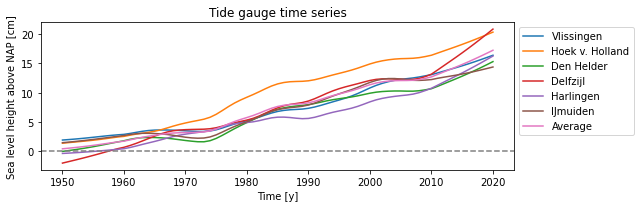

In [32]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [33]:
pres_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type, window = window)

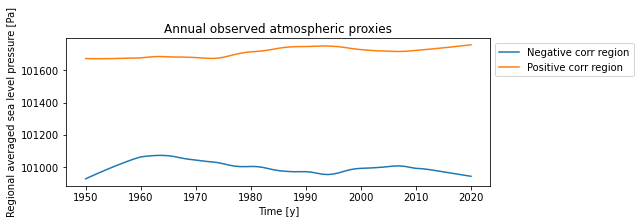

In [34]:
figs.plot_obs_pres_data(pres_data_era5, model, data_type)

### Perform regression

In [35]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(pres_data_era5, tg_data, wind_model = model, data_type = data_type)

In [36]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.960804,0.491105,0.258112,0.610876,0.875001,7.460060,-0.450238,-0.930341,4.866108
Hoek v. Holland,0.995581,0.678387,0.328317,0.776322,0.390922,10.102493,-0.416576,0.605008,5.121539
Den Helder,0.975464,0.767293,0.320380,0.790587,0.687294,6.402498,-0.173013,0.851077,3.497418
Delfzijl,0.978589,0.619115,0.260247,0.708498,0.861234,7.602202,-0.088356,0.163981,5.639087
Harlingen,0.971015,0.487642,0.262881,0.625422,0.753091,5.893476,-0.434510,-0.853398,4.839292
IJmuiden,0.947646,0.385779,0.292276,0.701168,1.006165,7.179520,-0.315047,0.065093,4.059360
Average,0.987582,0.300342,0.296504,0.721905,0.542495,7.431267,-0.330467,0.002416,4.662988


In [37]:
timeseries_era5

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             0.895695             1.245532 -8.310462 -6.169234   2.141227   
1951             0.702947             1.265755 -8.073020 -6.104318   1.968702   
1952             0.515452             1.276598 -7.835578 -6.043529   1.792049   
1953             0.332634             1.276842 -7.598136 -5.988660   1.609477   
1954             0.153974             1.266175 -7.360695 -5.940546   1.420149   
...                   ...                  ...       ...       ...        ...   
2016             0.432223            -0.999341  7.360695  6.793577  -0.567117   
2017             0.500690            -1.116235  7.598136  6.982591  -0.615546   
2018             0.568234            -1.236435  7.835578  7.167377  -0.668201   
2019             0.635303            -1.358264  8.073020  7.350059  -0.722961   
2020             0.703757            -1.481814  8.310462  7.532405  -0.778057   

          Hoek v. Holland                                            \
     Negative corr region Positive corr region     trend      total   
time                                                                  
1950             0.828728            -0.809979 -8.746693  -8.727944   
1951             0.650391            -0.823131 -8.496787  -8.669527   
1952             0.476914            -0.830182 -8.246882  -8.600150   
1953             0.307765            -0.830341 -7.996976  -8.519552   
1954             0.142462            -0.823404 -7.747071  -8.428013   
...                   ...                  ...       ...        ...   
2016             0.399908             0.649879  7.747071   8.796858   
2017             0.463255             0.725897  7.996976   9.186128   
2018             0.525750             0.804064  8.246882   9.576695   
2019             0.587804             0.883290  8.496787   9.967882   
2020             0.651140             0.963636  8.746693  10.361468   

                 ...             IJmuiden                                 \
     wind total  ... Negative corr region Positive corr region     trend   
time             ...                                                       
1950   0.018749  ...             0.626749            -0.087146 -6.932677   
1951  -0.172740  ...             0.491877            -0.088561 -6.734600   
1952  -0.353268  ...             0.360679            -0.089320 -6.536524   
1953  -0.522576  ...             0.232756            -0.089337 -6.338448   
1954  -0.680942  ...             0.107741            -0.088591 -6.140371   
...         ...  ...                  ...                  ...       ...   
2016   1.049787  ...             0.302442             0.069921  6.140371   
2017   1.189152  ...             0.350350             0.078100  6.338448   
2018   1.329813  ...             0.397613             0.086510  6.536524   
2019   1.471095  ...             0.444544             0.095034  6.734600   
2020   1.614776  ...             0.492443             0.103678  6.932677   

                                       Average                                 \
         total wind total Negative corr region Positive corr region     trend   
time                                                                            
1950 -6.393074   0.539603             0.657424            -0.003234 -7.963567   
1951 -6.331285   0.403315             0.515950            -0.003287 -7.736037   
1952 -6.265165   0.271359             0.378332            -0.003315 -7.508506   
1953 -6.195029   0.143419             0.244147            -0.003316 -7.280976   
1954 -6.121221   0.019150             0.113014            -0.003288 -7.053445   
...        ...        ...                  ...                  ...       ...   
2016  6.512734   0.372363             0.317244             0.002595  7.053445   
2017  6.76

In [38]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

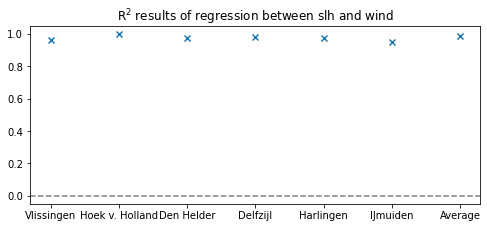

In [39]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

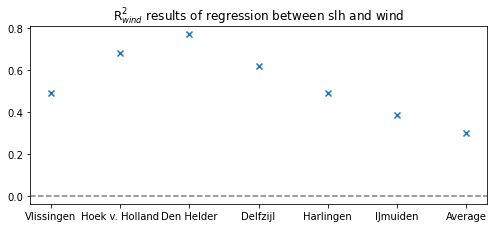

In [40]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, data_type)

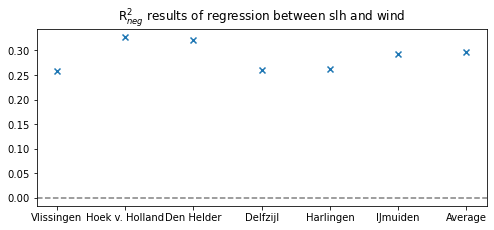

In [41]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{neg}$', model, data_type)

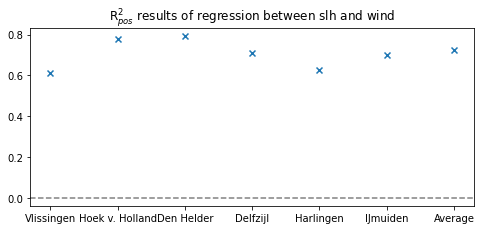

In [42]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{pos}$', model, data_type)

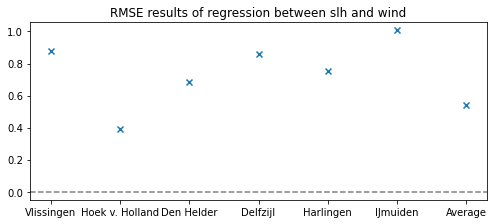

In [43]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

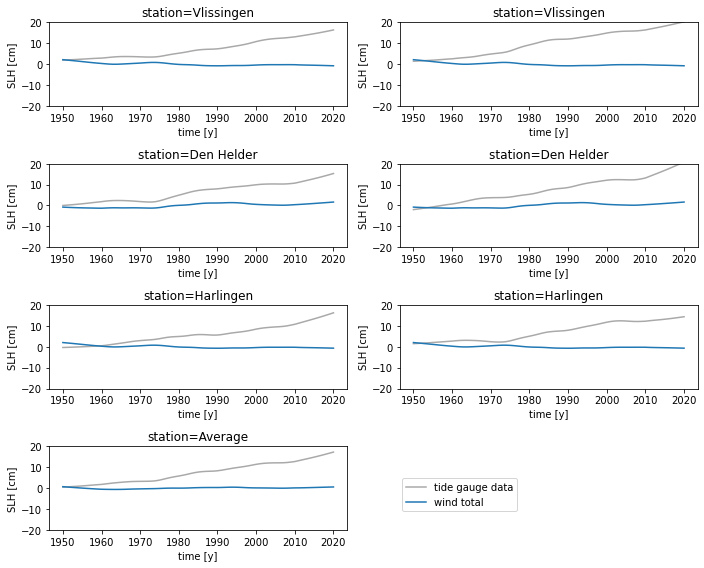

In [44]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, data_type)

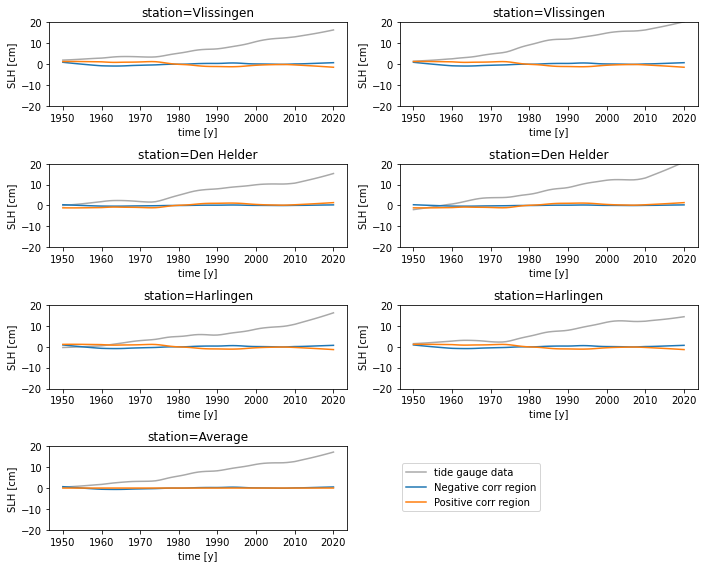

In [45]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region'], model, data_type)

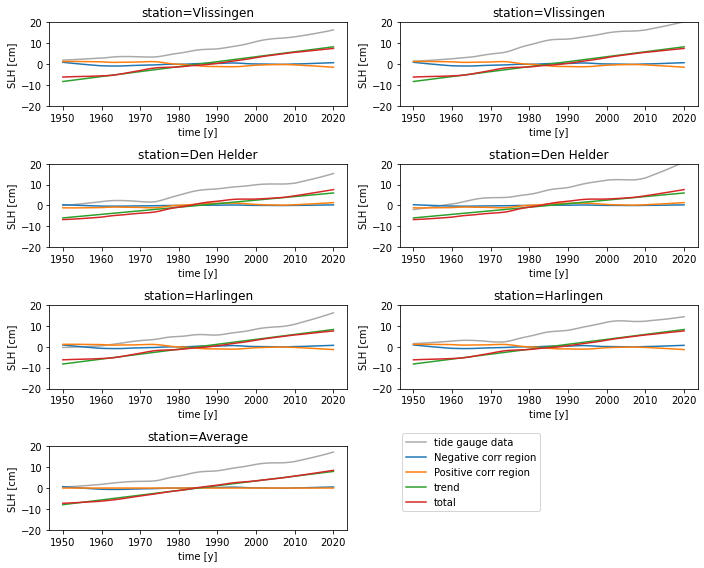

In [46]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

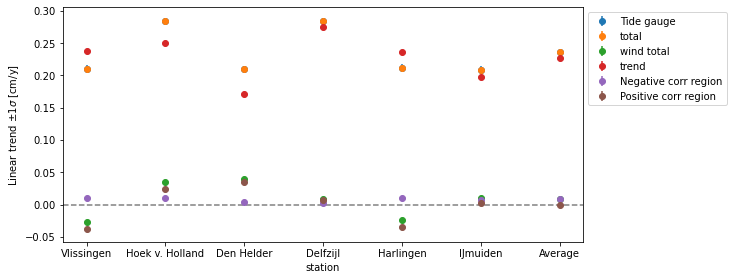

In [47]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

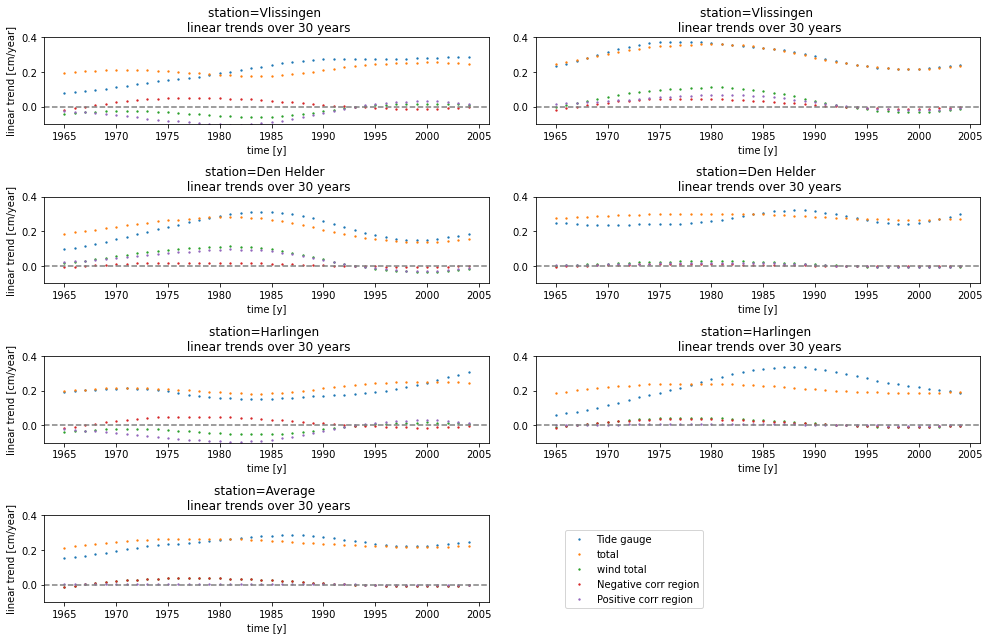

In [48]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [49]:
data_type = '20cr'

#### Import and plot tide gauge data

In [50]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type, window = window)

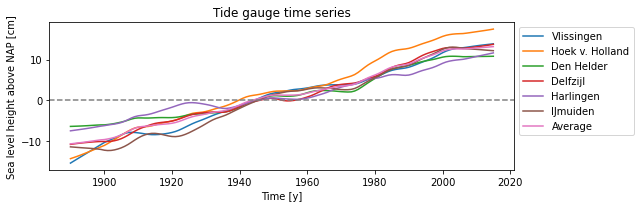

In [51]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [52]:
pres_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type, window = window)

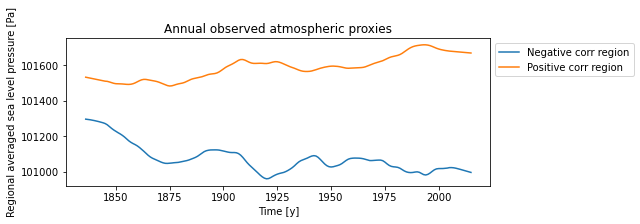

In [53]:
figs.plot_obs_pres_data(pres_data_20cr, model, data_type)

### Perform regression

In [54]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(pres_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [55]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.988423,0.339416,0.210288,0.548183,0.866852,-5.142302,0.581275,-0.181882,11.805291
Hoek v. Holland,0.994526,0.635453,0.293771,0.651857,0.677462,-4.363195,-0.468513,1.239575,11.847324
Den Helder,0.979604,0.639282,0.237959,0.679918,0.832089,-2.856709,0.901525,1.936235,6.998289
Delfzijl,0.991172,0.619578,0.294712,0.645723,0.710498,-4.650164,-0.466809,0.915708,9.820901
Harlingen,0.984004,0.617652,0.345559,0.675362,0.666870,-2.658540,-0.869722,0.805993,6.431099
IJmuiden,0.981543,0.363659,0.206638,0.540111,1.124754,-5.744852,0.608109,-0.256210,12.147151
Average,0.993579,0.620969,0.263017,0.620962,0.588710,-4.306987,0.001783,0.682647,9.916882


In [56]:
timeseries_20cr

Vlissingen                                             \
     Negative corr region Positive corr region      trend      total   
time                                                                   
1836             1.649717             0.149968 -20.334081 -18.534397   
1837             1.638994             0.156710 -20.106885 -18.311181   
1838             1.624933             0.163233 -19.879688 -18.091523   
1839             1.608578             0.169807 -19.652492 -17.874107   
1840             1.590404             0.176593 -19.425295 -17.658298   
...                   ...                  ...        ...        ...   
2011            -0.471131            -0.235407  19.425295  18.718757   
2012            -0.497365            -0.232401  19.652492  18.922726   
2013            -0.523435            -0.229644  19.879688  19.126609   
2014            -0.548840            -0.227069  20.106885  19.330976   
2015            -0.573648            -0.224626  20.334081  19.535808   

                     Hoek v. Holland                                  \
     wind total Negative corr region Positive corr region      trend   
time                                                                   
1836   1.799685            -1.329687            -1.022071 -20.406482   
1837   1.795704            -1.321044            -1.068026 -20.178476   
1838   1.788166            -1.309711            -1.112479 -19.950471   
1839   1.778385            -1.296529            -1.157283 -19.722466   
1840   1.766997            -1.281881            -1.203529 -19.494460   
...         ...                  ...                  ...        ...   
2011  -0.706538             0.379736             1.604363  19.494460   
2012  -0.729766             0.400880             1.583878  19.722466   
2013  -0.753079             0.421893             1.565091  19.950471   
2014  -0.775909             0.442370             1.547537  20.178476   
2015  -0.798274             0.462365             1.530888  20.406482   

                            ...             IJmuiden                       \
          total wind total  ... Negative corr region Positive corr region   
time                        ...                                             
1836 -22.758240  -2.351758  ...             1.725874             0.211253   
1837 -22.567546  -2.389070  ...             1.714655             0.220752   
1838 -22.372661  -2.422190  ...             1.699945             0.229940   
1839 -22.176278  -2.453812  ...             1.682836             0.239201   
1840 -21.979870  -2.485410  ...             1.663823             0.248759   
...         ...        ...  ...                  ...                  ...   
2011  21.478560   1.984099  ...            -0.492880            -0.331608   
2012  21.707224   1.984759  ...            -0.520325            -0.327374   
2013  21.937455   1.986984  ...            -0.547598            -0.323491   
2014  22.168384   1.989907  ...            -0.574177            -0.319863   
2015  22.399735   1.993253  ...            -0.600129            -0.316421   

                                                   Average  \
          trend      total wind total Negative corr region   
time                                                         
1836 -20.922919 -18.985792   1.937127             0.005060   
1837 -20.689143 -18.753736   1.935407             0.005027   
1838 -20.455368 -18.525483   1.929885             0.004984   
1839 -20.221592 -18.299556   1.922036             0.004934   
1840 -19.987817 -18.075234   1.912582             0.004878   
...         ...        ...        ...                  ...   
2011  19.987817  19.163328  -0.824488            -0.001445   
2012  20.221592  19.373893  -0.847699            -0.001525   
2013  20.455368  19.584279  -0.871089            -0.001605   
2014  20.689143  19.795104  -0.894039            -0.001683   
2015  20.922919  20.006368  -0.916551            -0.001759   

                                                 

In [57]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

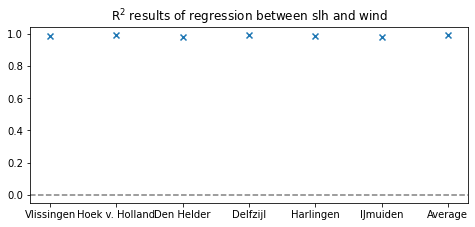

In [58]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

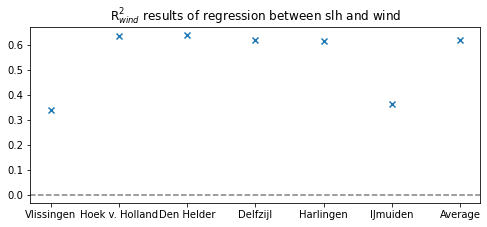

In [59]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, data_type)

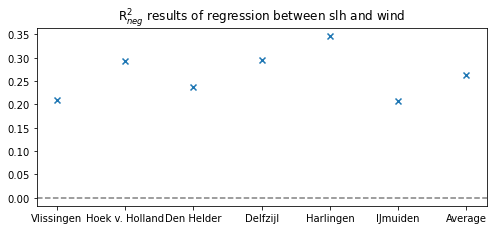

In [60]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{neg}$', model, data_type)

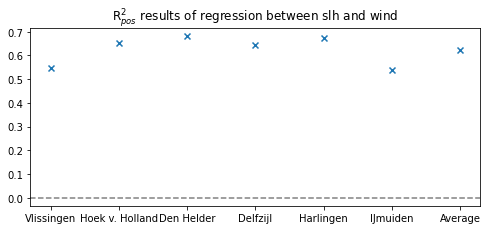

In [61]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{pos}$', model, data_type)

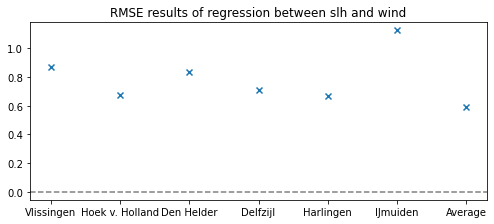

In [62]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

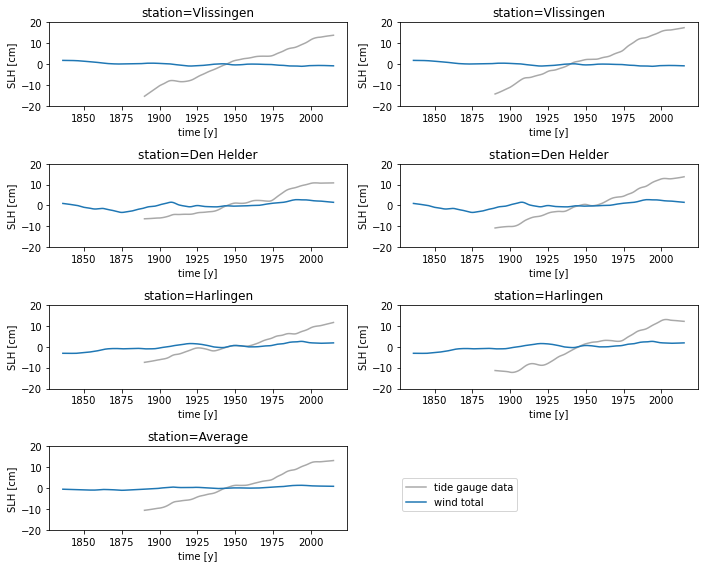

In [63]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, data_type)

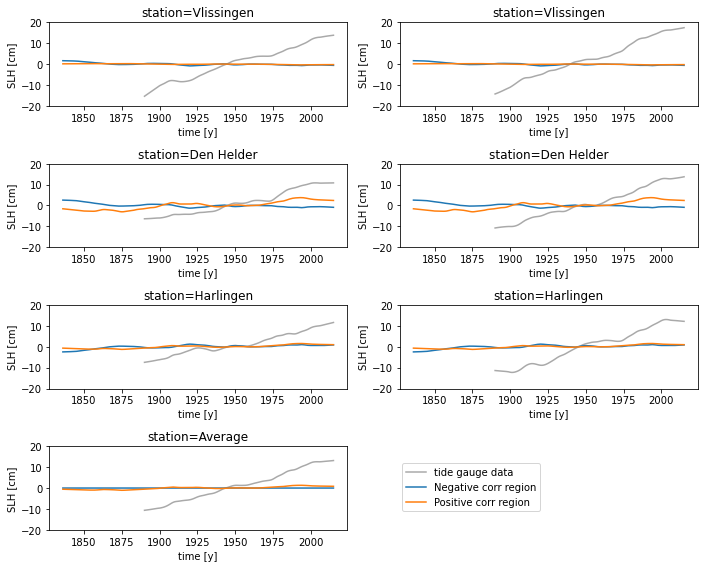

In [64]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region'], model, data_type)

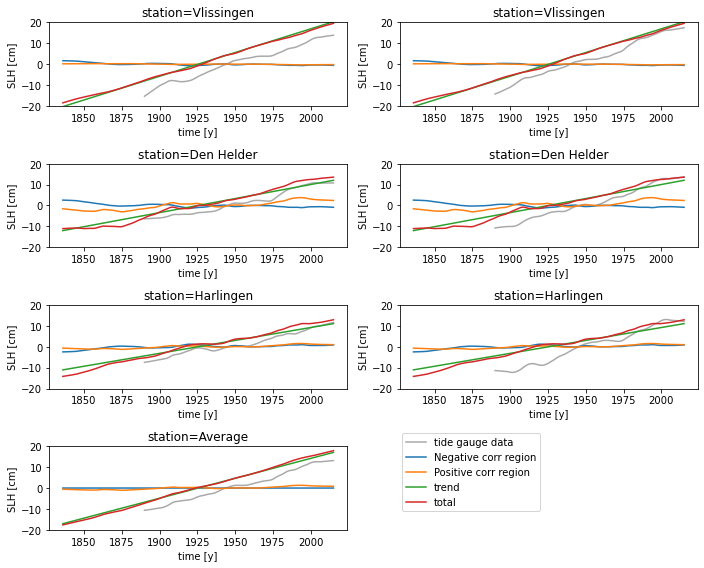

In [65]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

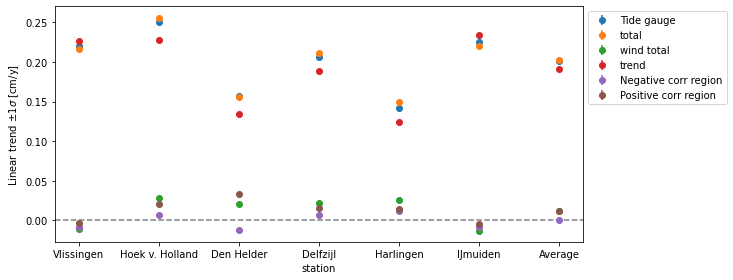

In [66]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

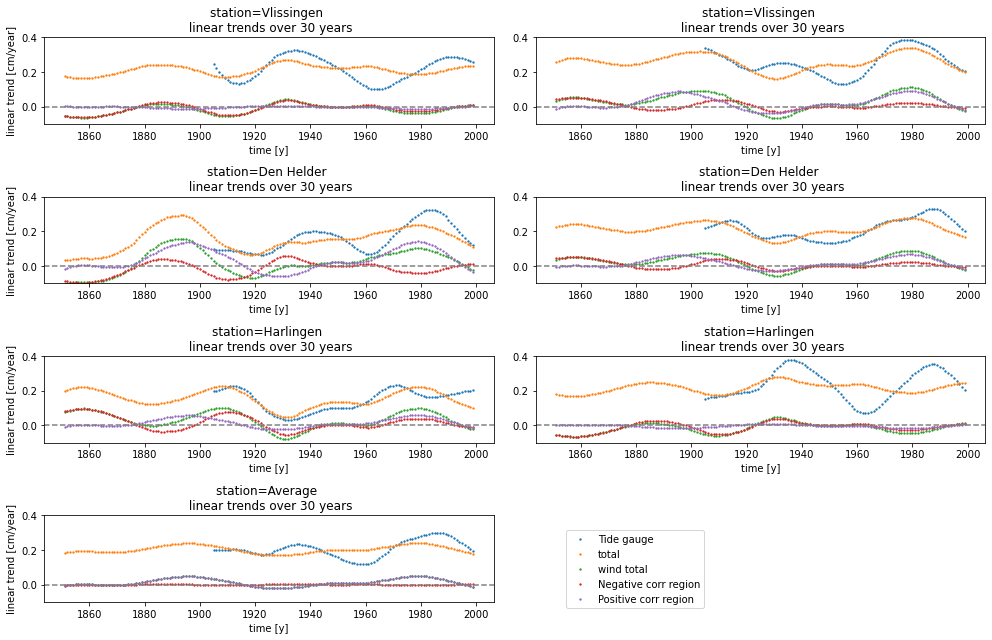

In [67]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)